<p align="center">
    <b><big>CRISP-DM (Cross Industry Standard Process for Data Mining)</big></b>
</p>


<b><font color="green">1. Crips flow</font></b>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*vrmyUcAjG3UTxBpOXcyuPg.png">

<b>2. Phases and generic tasks of CRISP-DM</b>

<img src="https://www.researchgate.net/publication/283430974/figure/fig1/AS:614004070309903@1523401386613/phases-and-generic-tasks-of-CRISP-DM.png">

# Bussiness Understanding

Business Understanding adalah tahap awal dari proses analisis data atau proyek data science, dan tujuannya adalah untuk memahami kebutuhan bisnis, tujuan proyek, serta bagaimana hasil dari analisis atau model akan digunakan untuk memberikan nilai tambah pada bisnis

## Ruang lingkup

Dalam suatu perusahaan penyedia jasa asuransi kesehatan sedang mengalami masalah karena banyaknya klaim asuransi dan tidak efisiennya program asuransi dalam beberapa tahun terakhir. Perusahaan membutuhkan studi pengetahuan untuk menjauhkan pelanggan dari penyakit DIABETES. Dengan mengetahui profil pelanggan yang dapat terjangkit penyakit DIABETES, serta mengetahui faktor penyebanya. Akan membantu perusahaan dalam mengurangi claim terhadap asuransi dan memperoleh keuntungan sebanyak mungkin.

## Problem statement

1. Atribut apa yang paling berpengaruh terhadap penyakit DIABETES? <br>
2. Memprediksi pelanggan yang dapat berpotensi menderita DIABETES

## Goal

1. mengetahui atribut apa saja penyebab diabetes? <br>
2. Membuat model yang dapat memprediksi diabetes?

# Data Understanding

    Memahami domain masalah dan tujuan analisis.
    Mengumpulkan data dan memahami sumber data.
    Menentukan label (target) dan fitur (atribut bebas).
    Memahami struktur data dan konteks dari variabel-variabel yang ada.

## Overview data

Dataset ini merupakan bagian dari dataset besar yang dimiliki oleh National Institutes of Diabetes-Digestive-Kidney Diseases di Amerika Serikat. Data tersebut digunakan untuk penelitian diabetes pada wanita Indian Pima berusia 21 tahun ke atas yang tinggal di Phoenix, kota terbesar kelima di negara bagian Arizona, Amerika Serikat. <br>
<b>sumber: https://www.kaggle.com/datasets/mathchi/diabetes-data-set.</b> <br>
<b>Penjelasan Data </b><br>

    Pregnancies: The number of pregnancies
    Glucose: 2-hour plasma glucose concentration in the oral glucose tolerance test
    Blood Pressure: Blood Pressure (Small blood pressure) (mmHg)
    SkinThickness: Skin Thickness (mm)
    Insulin: 2-hour serum insulin (mu U/ml)
    DiabetesPedigreeFunction: A function that calculates the probability of having diabetes according to the descendants
    BMI: Body mass index
    Age: Age (year)
    Outcome: Have the disease (1) or not (0)


<b> Note. Dataset yang akan digunakan sudah dimodifikasi </b>

<b> Load semua library diatas </b>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Load dan overview data

In [ ]:
driveawal ='' #kalau pakai local

In [ ]:
from google.colab import drive #kalau pakai Colabs
drive.mount('/content/drive')
driveawal ='drive/MyDrive/Dncc live coding/' #arahkan ke lokasi drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv(driveawal+'diabetes_modified.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
801,1,128.0,82.0,17,183,27.5,0.115,22,0
802,1,103.0,80.0,11,82,19.4,0.491,22,0
803,5,136.0,84.0,41,88,35.0,0.286,35,1
804,0,137.0,40.0,35,168,43.1,2.288,33,1


diketahui total data sejumlah 809 dan terdapat 9 kolom (attribut)

### Missing value dan tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               806 non-null    int64  
 1   Glucose                   727 non-null    float64
 2   BloodPressure             727 non-null    float64
 3   SkinThickness             806 non-null    int64  
 4   Insulin                   806 non-null    int64  
 5   BMI                       806 non-null    float64
 6   DiabetesPedigreeFunction  806 non-null    float64
 7   Age                       806 non-null    int64  
 8   Outcome                   806 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.8 KB


diketahui jumlah data 806 dan terdapat beberapa data yang null (missing value) dan tipe data yang digunakan

In [ ]:
# tampilkan jumlah null
null_counts = df.isnull().sum()
print("\nJumlah nilai null di setiap kolom:")
print(null_counts)


Jumlah nilai null di setiap kolom:
Pregnancies                  0
Glucose                     79
BloodPressure               79
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


### Cek duplikasi

In [ ]:
# Memeriksa duplikat
duplikat = df.duplicated()
# Menampilkan baris yang duplikat
baris_duplikat = df[df.duplicated()]
print("\n Jumlah baris duplikat:\n", len(baris_duplikat))


 Jumlah baris duplikat:
 38


### Menentukan label (target) dan fitur (atribut bebas)

In [ ]:
X = df.drop(columns=["Outcome"])  # Mengambil semua kolom kecuali kolom "label"
y = df["Outcome"]  # Mengambil kolom "label

X.head() #tampilkan contoh data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,0,33.6,0.627,50
1,1,85.0,66.0,29,0,26.6,0.351,31
2,8,183.0,64.0,0,0,23.3,0.672,32
3,1,89.0,66.0,23,94,28.1,0.167,21
4,0,137.0,40.0,35,168,43.1,2.288,33


## Exploratory Data Analysis (EDA)

Tahap ini melibatkan:

    Menganalisis data untuk memahami pola, distribusi, dan hubungan antar variabel.
    Mendeteksi nilai yang hilang dan outliers.
    Visualisasi data untuk menggali lebih dalam tentang karakteristik dataset.
    Melakukan analisis statistik deskriptif.

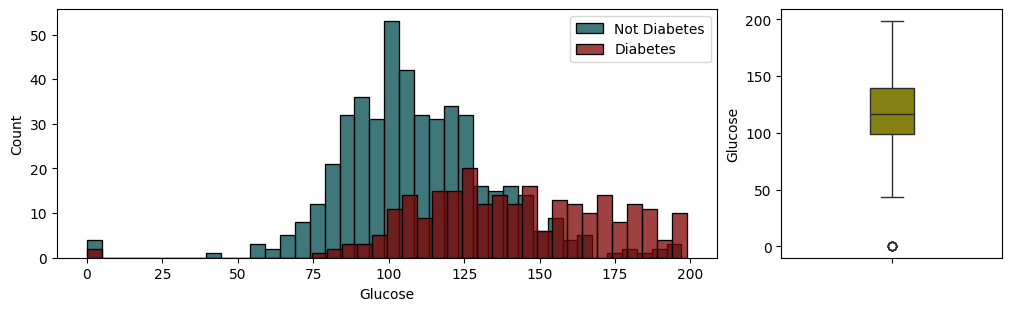

In [ ]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])
    sns.histplot(df.loc[df["Outcome"]==0,feature],
                 kde = False, color = "#004a4d",
                  bins=40,
                 label="Not Diabetes", ax=ax1);
    sns.histplot(df.loc[df["Outcome"]==1,feature],
                 kde = False, color = "#7d0101",
                 bins=40,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])
    sns.boxplot(X[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);

    ax1.legend(loc="upper right");


plots("Glucose")

### Pearson corelation matrix

 Korelasi Pearson adalah salah satu metode untuk menghitung korelasi antara dua variabel. Ketika kita menghitung korelasi Pearson untuk setiap pasangan variabel dalam sebuah DataFrame, hasilnya adalah sebuah matriks korelasi.
    Nilai korelasi (r) dekat dengan 1 atau -1 menunjukkan hubungan linear yang kuat.
    Nilai korelasi (r) dekat dengan 0 menunjukkan hubungan linear yang lemah atau tidak ada hubungan linear.

Interpretasi Umum

Berikut adalah interpretasi umum dari nilai korelasi Pearson:

    |r| ≥ 0.9: Korelasi sangat kuat
    0.7 ≤ |r| < 0.9: Korelasi kuat
    0.5 ≤ |r| < 0.7: Korelasi sedang
    0.3 ≤ |r| < 0.5: Korelasi lemah
    |r| < 0.3: Korelasi sangat lemah atau tidak ada korelasi

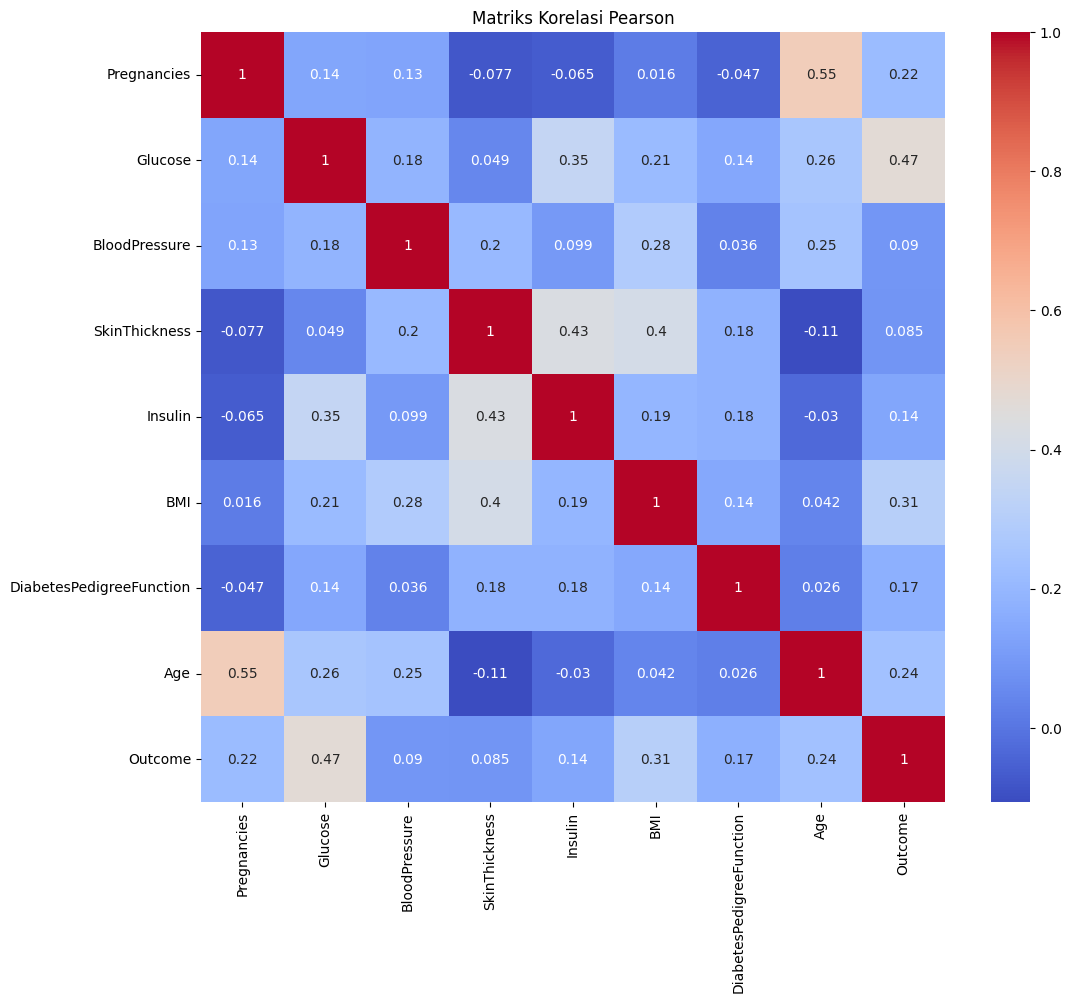

In [ ]:
# Menghitung matriks korelasi Pearson
correlation_matrix = df.corr(method='pearson')
plt.figure(figsize=(12,10))
# Membuat heatmap dari matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Pearson')
plt.show()

opsi lain bisa menggunakan scatter plot antar atribut

In [ ]:
# Menentukan threshold
threshold = 0.3

# Mencari pasangan atribut yang berpengaruh berdasarkan threshold
influential_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            influential_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Menampilkan hasil
print("Atribut yang saling berpengaruh berdasarkan threshold:")
for pair in influential_pairs:
    print(f"Atribut {pair[0]} dan {pair[1]} memiliki korelasi {pair[2]:.2f}")

print('Pada tahapan ini anda juga bisa membuang atribut yang tidak relevan')

Atribut yang saling berpengaruh berdasarkan threshold:
Atribut Pregnancies dan Age memiliki korelasi 0.55
Atribut Glucose dan Insulin memiliki korelasi 0.35
Atribut Glucose dan Outcome memiliki korelasi 0.47
Atribut SkinThickness dan Insulin memiliki korelasi 0.43
Atribut SkinThickness dan BMI memiliki korelasi 0.40
Atribut BMI dan Outcome memiliki korelasi 0.31
Pada tahapan ini anda juga bisa membuang atribut yang tidak relevan


### Mengetahui proporsi jumlah tiap label

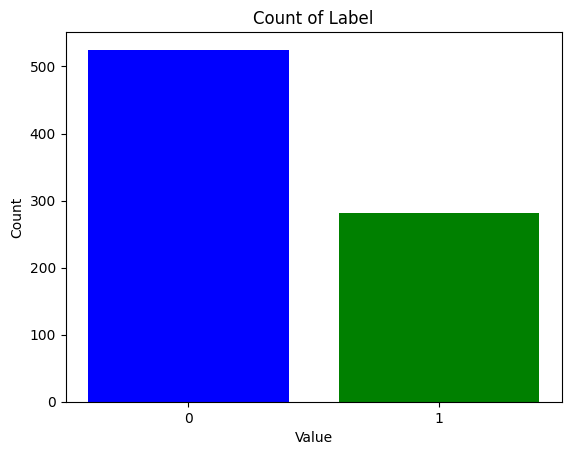

In [ ]:
# Menghitung jumlah 0 dan 1
unique, counts = np.unique(y, return_counts=True)
count_dict = dict(zip(unique, counts))
keys_list = list(count_dict.keys())

# Plot jumlah 0 dan 1 ke dalam diagram batang
plt.bar(count_dict.keys(), count_dict.values(), color=['blue', 'green'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of Label')
plt.xticks(keys_list, keys_list)
plt.show()

dapat disimpulkan label tidak imbang

### Analisa deskriptif

In [ ]:
df.describe() #jika data categorical "string" bisa gunakan bar plot

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,806.000000,727.000000,727.000000,806.000000,806.000000,806.000000,806.000000,806.000000,806.000000
mean,3.815136,120.616231,69.056396,20.682382,80.548387,31.930025,0.468635,33.166253,0.348635
std,3.344311,32.374060,19.135615,15.844222,114.901360,7.976834,0.333260,11.763916,0.476834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.240250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.000000,0.365500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.750000,36.575000,0.613750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


dapat dilihat range nilai data dari tiap attribut dan dapat juga untuk melihat outlier

### Cek data outlier (box plot)

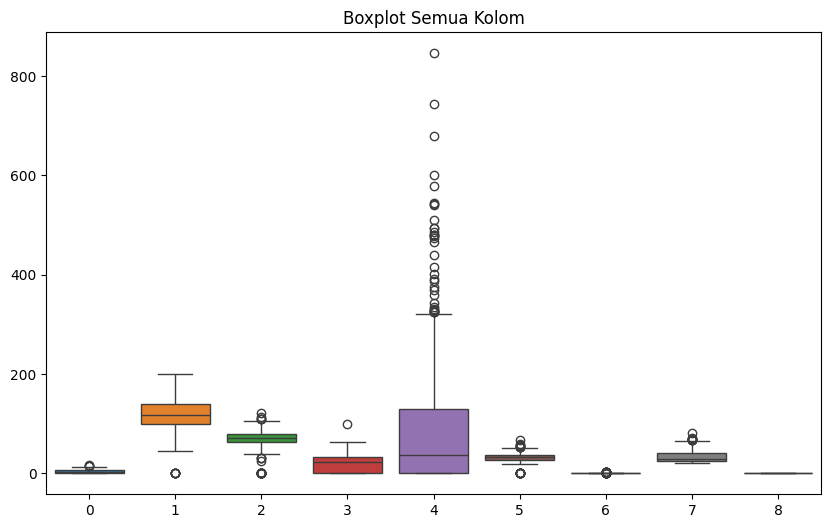

In [ ]:
# Membuat boxplot untuk setiap kolom
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.values)
plt.title('Boxplot Semua Kolom')
plt.show()

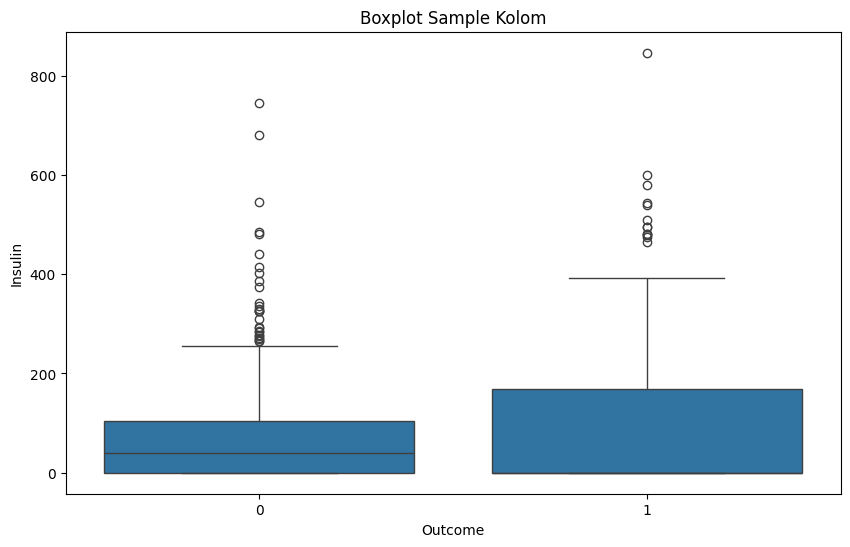

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title('Boxplot Sample Kolom')
plt.show()

# Preprocessing

<img src="https://cdn.letterdrop.co/pictures/fe3db832-862f-4a35-be7c-37231ad814bb.png">

Tahap ini melibatkan:

    Membersihkan data dari nilai-nilai yang hilang dan outliers.
    Transformasi variabel jika diperlukan (misalnya, normalisasi atau standaridasi).
    Encoding variabel kategorikal.
    Membagi dataset menjadi training dan testing set.

## Hapus Missing Value (NULL)

In [ ]:
df_no_null = df.dropna()
df_no_null_reset = df_no_null.reset_index(drop=True)
df_no_null_reset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
722,1,128.0,82.0,17,183,27.5,0.115,22,0
723,1,103.0,80.0,11,82,19.4,0.491,22,0
724,5,136.0,84.0,41,88,35.0,0.286,35,1
725,0,137.0,40.0,35,168,43.1,2.288,33,1


jumlah data berkurang dari 806 ke 727

## Hapus Duplikat

In [ ]:
df_no_duplicates = df_no_null_reset.drop_duplicates()
df_no_duplicates_reset = df_no_duplicates.reset_index(drop=True)
df_no_duplicates_reset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
687,9,89.0,62.0,0,0,22.5,0.142,33,0
688,10,101.0,76.0,48,180,32.9,0.171,63,0
689,5,121.0,72.0,23,112,26.2,0.245,30,0
690,1,126.0,60.0,0,0,30.1,0.349,47,1


setelah dihapus duplikasi berkurang dari 727 ke 692

## Hapus outlier (IQR)

IQR adalah singkatan dari Interquartile Range, yaitu rentang antar kuartil. IQR adalah ukuran statistik yang digunakan untuk menggambarkan penyebaran tengah dalam kumpulan data dan sering digunakan untuk mengidentifikasi outlier.

<b>Rumus IQR</b>

IQR adalah selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1) dalam dataset. Kuartil adalah nilai yang membagi data yang diurutkan menjadi empat bagian yang sama besar.

    Q1 (Kuartil Pertama): Nilai di bawah 25% dari data terletak.
    Q3 (Kuartil Ketiga): Nilai di bawah 75% dari data terletak.
    IQR (Interquartile Range): Dihitung sebagai Q3 - Q1.

In [ ]:
# Mendefinisikan fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Memfilter data yang berada dalam rentang [lower_bound, upper_bound]
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_cleaned

# Menghapus outlier
df_cleaned = remove_outliers_iqr(df_no_duplicates_reset)

print("Data setelah menghapus outlier:")
df_cleaned

Data setelah menghapus outlier:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
5,5,116.0,74.0,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
687,9,89.0,62.0,0,0,22.5,0.142,33,0
688,10,101.0,76.0,48,180,32.9,0.171,63,0
689,5,121.0,72.0,23,112,26.2,0.245,30,0
690,1,126.0,60.0,0,0,30.1,0.349,47,1


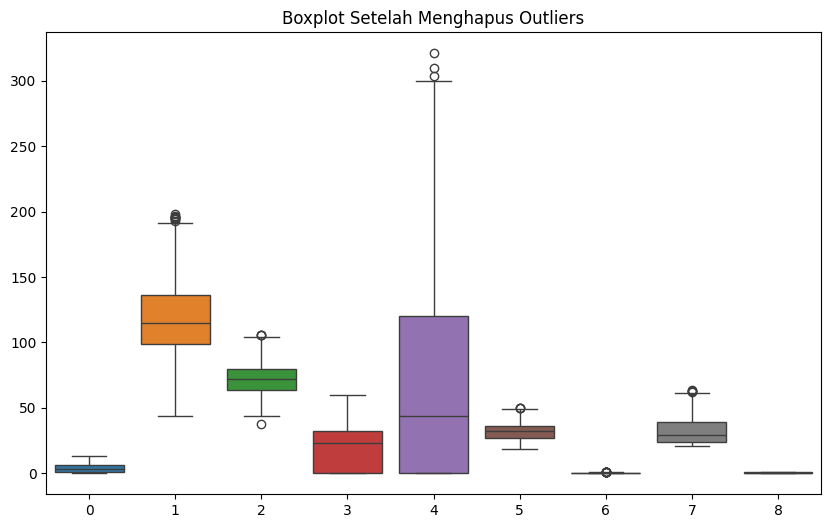

In [ ]:
# Visualisasi data setelah menghapus outliers dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned.values)
plt.title('Boxplot Setelah Menghapus Outliers')
plt.show()

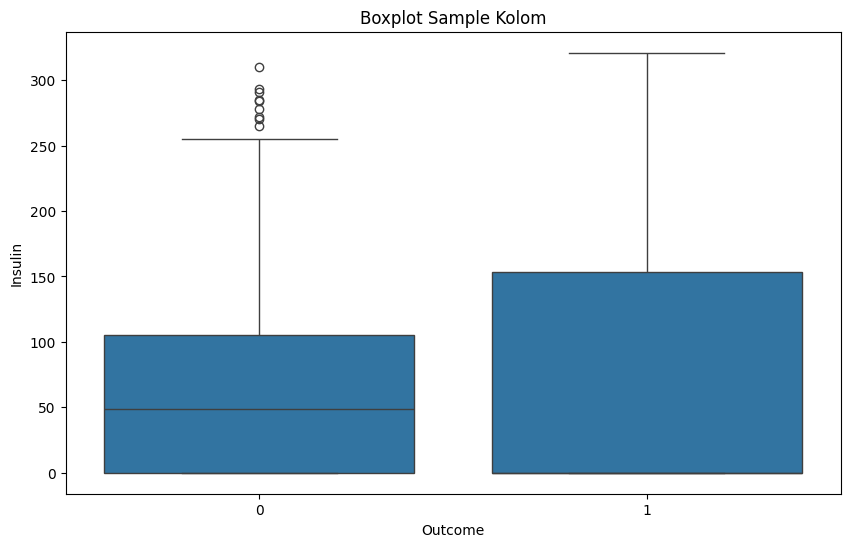

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Insulin', data=df_cleaned)
plt.title('Boxplot Sample Kolom')
plt.show()

## Ubah tipe data

In [ ]:
df_cleaned.loc[:, 'Glucose'] = df_cleaned['Glucose'].astype(int)
df_cleaned.loc[:, 'BloodPressure'] = df_cleaned['BloodPressure'].astype(int)

In [ ]:
df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,3.738676,119.102787,72.038328,20.735192,67.287456,32.086411,0.430878,32.052265,0.317073
std,3.231823,29.023819,11.397250,15.371930,79.431285,6.460844,0.248712,10.288206,0.465742
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.244250,24.000000,0.000000
50%,3.000000,114.500000,72.000000,23.000000,44.000000,32.000000,0.367000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,120.000000,36.100000,0.587000,39.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,321.000000,50.000000,1.191000,64.000000,1.000000


## Cleaning out range.
Bisa dengan menghapus, median, mean

In [ ]:
# Hapus baris yang memiliki nilai 0 di kolom 'SkinThickness' dan 'Insulin'
df_cleaned = df_cleaned[(df_cleaned['SkinThickness'] != 0) & (df_cleaned['Insulin'] != 0)]

# Menampilkan deskripsi dari DataFrame setelah penghapusan
df_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.160656,119.439344,70.839344,28.580328,126.632787,32.404918,0.472210,30.101639,0.278689
std,3.005000,29.077886,11.525591,10.515071,65.973252,6.376732,0.247542,9.281392,0.449091
min,0.000000,56.000000,38.000000,8.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,20.000000,75.000000,27.500000,0.268000,23.000000,0.000000
50%,2.000000,116.000000,70.000000,28.000000,115.000000,32.900000,0.439000,26.000000,0.000000
75%,5.000000,136.000000,78.000000,36.000000,168.000000,36.500000,0.640000,35.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,321.000000,49.700000,1.189000,63.000000,1.000000


In [ ]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23,94,28.1,0.167,21,0
6,3,78.0,50.0,32,88,31.0,0.248,26,1
14,5,166.0,72.0,19,175,25.8,0.587,51,1
16,0,118.0,84.0,47,230,45.8,0.551,31,1
19,1,115.0,70.0,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
675,3,187.0,70.0,22,200,36.4,0.408,36,1
678,1,121.0,78.0,39,74,39.0,0.261,28,0
681,1,128.0,88.0,39,110,36.5,1.057,37,1
688,10,101.0,76.0,48,180,32.9,0.171,63,0


data berkurang 574 jadi 305

## Susun ulang variable X dan y

In [ ]:
X = df_cleaned.drop(columns=["Outcome"])  # Mengambil semua kolom kecuali kolom "label"
y = df_cleaned["Outcome"]  # Mengambil kolom "label

X.head() #tampilkan contoh data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23,94,28.1,0.167,21
6,3,78.0,50.0,32,88,31.0,0.248,26
14,5,166.0,72.0,19,175,25.8,0.587,51
16,0,118.0,84.0,47,230,45.8,0.551,31
19,1,115.0,70.0,30,96,34.6,0.529,32


## Split data

<img src="https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg">

In [ ]:
# Split dataset
# Membagi data menjadi train (70%) dan sementara (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Membagi data sementara menjadi validation (50% dari 20% yaitu 10%) dan test (50% dari 20% yaitu 10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Memeriksa proporsi data
print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Train set: 244 samples
Validation set: 30 samples
Test set: 31 samples


## Handeling imbalance data

Apa itu SMOTE?

SMOTE adalah metode yang digunakan untuk menghasilkan sampel-sampel baru dari kelas minoritas (kelas dengan jumlah sampel yang lebih sedikit) untuk menyeimbangkan distribusi kelas dalam dataset. SMOTE bekerja dengan cara membuat sampel-sampel sintetis berdasarkan sampel-sampel yang sudah ada dengan menggunakan pendekatan ketetanggaan.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*yRumRhn89acByodBz0H7oA.png">

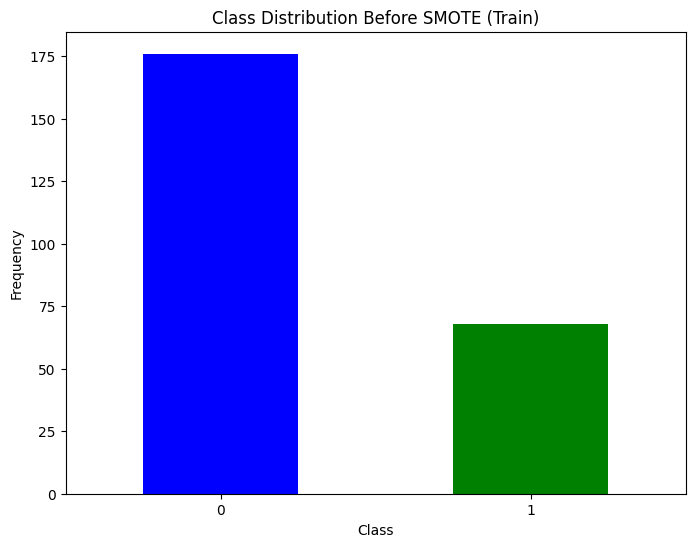

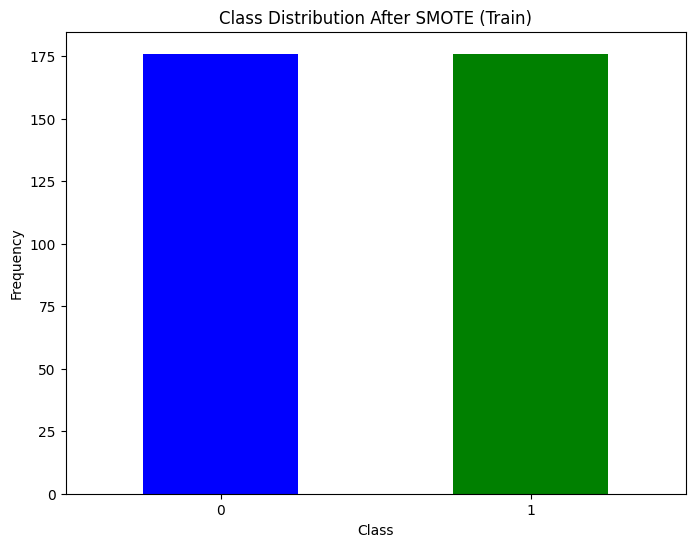

In [ ]:
# Function to plot class distribution
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    y.value_counts().sort_index().plot(kind='bar', color=['blue', 'green'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

# Plot class distribution before SMOTE
plot_class_distribution(y_train, 'Class Distribution Before SMOTE (Train)')

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMote
plot_class_distribution(y_train_resampled, 'Class Distribution After SMOTE (Train)')

# Modeling

## Fitur important

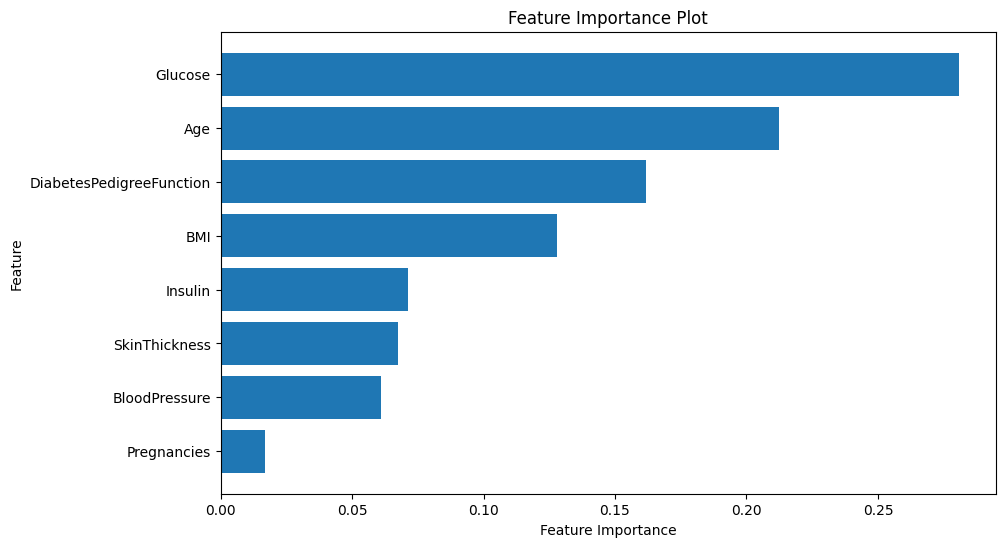

In [ ]:
# Membuat model Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_resampled, y_train_resampled)

# Menghitung fitur importansi
importances = gb.feature_importances_
indices = np.argsort(importances)

# Plot fitur importansi
plt.figure(figsize=(10, 6))
plt.barh(range(X_train_resampled.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train_resampled.shape[1]), [X_train_resampled.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

## Training

ANN (Artificial Neural Network) adalah model komputasi yang terinspirasi oleh jaringan saraf biologis, seperti otak manusia. ANN digunakan dalam pembelajaran mesin dan kecerdasan buatan untuk memecahkan berbagai masalah seperti klasifikasi, regresi, dan pengenalan pola. ANN juga merupakan cikal bakal arsitektur deeplearning
<img src="https://miro.medium.com/v2/1*Gh5PS4R_A5drl5ebd_gNrg@2x.png">

In [30]:
# Membuat model neural network sederhana
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,  input_shape=(8,), activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Layer Normalization untuk normalisasi fitur
    tf.keras.layers.Dense(64,  activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Layer Normalization untuk normalisasi fitur
    tf.keras.layers.Dense(32,  activation='relu'),
    tf.keras.layers.BatchNormalization(),  # Layer Normalization untuk normalisasi fitur
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Kompilasi model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                1

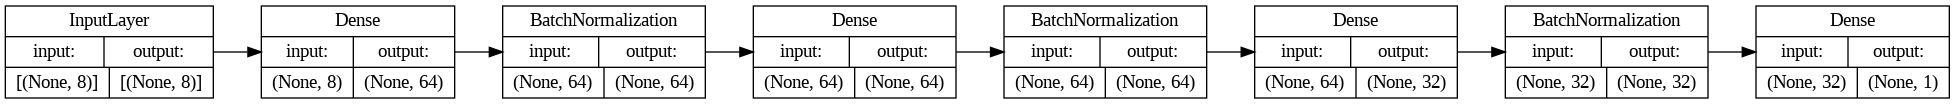

In [31]:
plot_model(model, to_file=driveawal+'cnn_model.png', show_shapes=True, show_layer_names=False, rankdir="LR")

In [32]:
# Melatih model
# Membuat callback ModelCheckpoint untuk menyimpan model terbaik berdasarkan akurasi validasi
checkpoint = ModelCheckpoint(
    filepath=driveawal+'best_model_fix.h5',    # Nama file untuk menyimpan model
    monitor='val_loss',          # Metrik yang dipantau
    save_best_only=True         # Hanya menyimpan model terbaik
)

# Membuat callback EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metrik yang dipantau
    restore_best_weights = True,
    patience=50       # Jumlah epoch tanpa peningkatan sebelum pelatihan berhenti
)

history = model.fit(X_train_resampled, y_train_resampled, epochs=500, batch_size=32, validation_data=(X_val,y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/500
11/11 [==============================] - 3s 51ms/step - loss: 1.4347 - accuracy: 0.2784 - val_loss: 1.0438 - val_accuracy: 0.4333
Epoch 2/500
 1/11 [=>............................] - ETA: 0s - loss: 1.2412 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 14ms/step - loss: 1.2427 - accuracy: 0.3097 - val_loss: 0.9609 - val_accuracy: 0.3333
Epoch 3/500
11/11 [==============================] - 0s 8ms/step - loss: 1.1148 - accuracy: 0.3295 - val_loss: 0.9676 - val_accuracy: 0.3000
Epoch 4/500
11/11 [==============================] - 0s 8ms/step - loss: 1.0250 - accuracy: 0.3466 - val_loss: 0.9972 - val_accuracy: 0.2333
Epoch 5/500
11/11 [==============================] - 0s 10ms/step - loss: 0.9345 - accuracy: 0.4091 - val_loss: 1.0334 - val_accuracy: 0.2667
Epoch 6/500
11/11 [==============================] - 0s 8ms/step - loss: 0.8341 - accuracy: 0.4375 - val_loss: 1.0535 - val_accuracy: 0.2667
Epoch 7/500
11/11 [==============================] - 0s 8ms/step - loss: 0.7712 - accuracy: 0.4972 - val_loss: 1.0620 - val_accuracy: 0.2333
Epoch 8/500
11/11 [==============================] - 0s 7ms/step - loss: 0.6834 - accuracy: 0.5682 - val_loss: 1.0571 - val_accuracy: 0.2333
Epoch 9/500
11/11 [====

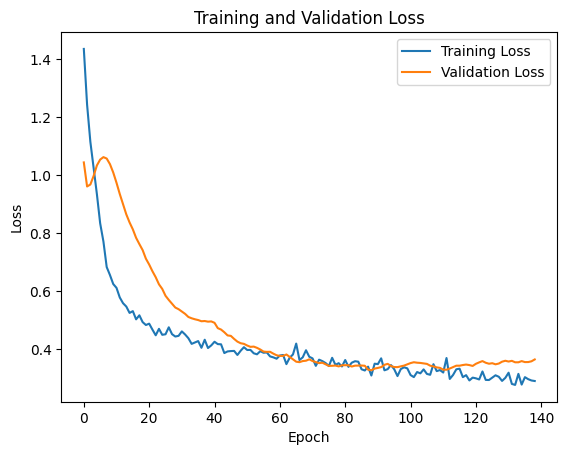

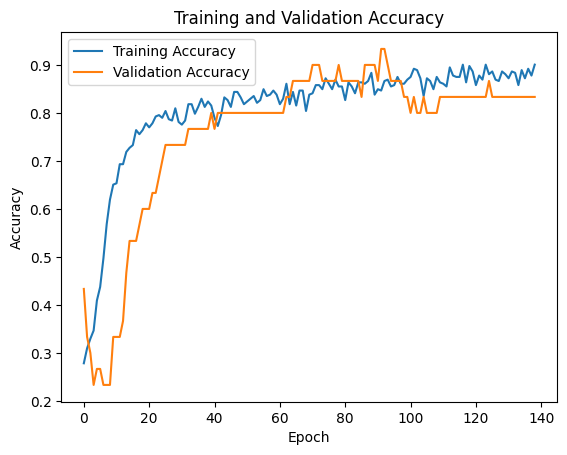

In [33]:
# Memplot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Memplot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# <img src="https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png">

## Testing

In [34]:
# Evaluasi model dengan data uji
y_pred_encoded = model.predict(X_test)
y_pred = (y_pred_encoded > 0.5).astype(np.int64)

1/1 [==============================] - 0s 160ms/step


bisa juga menggunakan kfold agar model lebih baik

# Evaluation

## Confussion Matrix

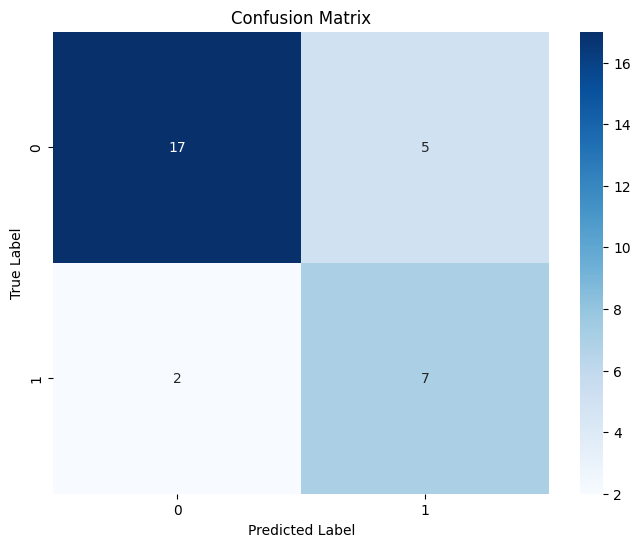

In [35]:
# Membuat confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [36]:
# Membuat classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.58      0.78      0.67         9

    accuracy                           0.77        31
   macro avg       0.74      0.78      0.75        31
weighted avg       0.80      0.77      0.78        31



    - Akurasi mengukur seberapa sering model klasifikasi benar dalam memprediksi kelas secara keseluruhan.
    - Presisi mengukur seberapa sering prediksi positif model benar saat sebenarnya positif.
    - Recall mengukur seberapa sering model dapat memprediksi positif dengan benar dari semua kasus yang sebenarnya positif.
    - F1 score adalah ukuran gabungan dari presisi dan recall, yang merupakan harmonic mean dari kedua metrik tersebut.

## Simpan model

In [37]:
# Simpan model ke format TFLite
best = model.save(driveawal+"model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Deployment

## Convert model

In [38]:
# Konversi model H5 ke format TFLite
model = tf.keras.models.load_model(driveawal+"best_model_fix.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TFLite ke file
with open(driveawal+"model2.tflite", "wb") as f:
    f.write(tflite_model)

## Build Simple HTML

<img src="https://miro.medium.com/v2/resize:fit:1400/1*XQjVnZhDL-hvNoe84byyiw.png">